# Processing Analysis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
data = pd.read_csv('dataframe_.csv')
data.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [21]:
data.shape

(1697, 2)

In [22]:
data.columns

Index(['input', 'output'], dtype='object')

In [23]:
data.dtypes

input     float64
output    float64
dtype: object

In [24]:
data['output'].value_counts()

-95.000000     32
-78.000000     12
-33.000000     12
-75.000000     10
-32.000000     10
               ..
 115.000000     1
-0.510703       1
 115.438049     1
-48.473313      1
-79.131137      1
Name: output, Length: 969, dtype: int64

In [25]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [104]:
data.astype(int)

,input,output
0,-122,-130
1,-121,-129
2,-134,-130
3,-120,-125
4,-129,-112
...,...,...
1692,25,-76
1693,29,-82
1694,31,-87
1695,29,-104


In [36]:
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)


In [38]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1697 non-null   float64
 1   output  1697 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [40]:
data.describe()

,input,output
count,1697.000000,1697.000000
mean,1.159956,-34.088024
std,78.982675,65.751719
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.008175,-50.376850
75%,70.264109,-11.000000
max,134.605775,134.425495


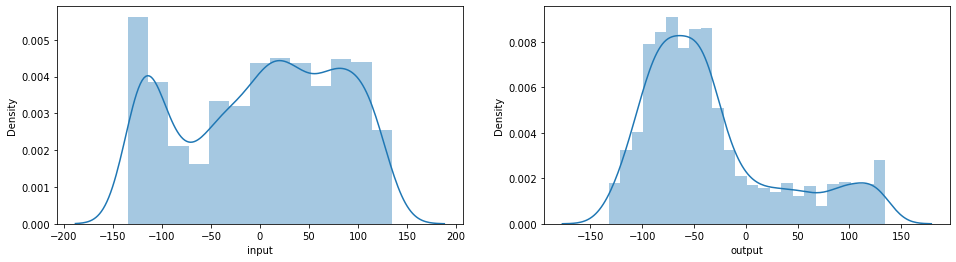

In [41]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(data['input'])
plt.subplot(1,2,2)
sns.distplot(data['output'])
plt.show()

<AxesSubplot:xlabel='output'>

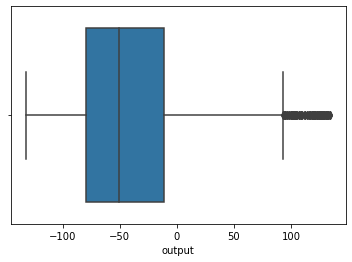

In [42]:
sns.boxplot(data['output'])


<AxesSubplot:xlabel='output', ylabel='count'>

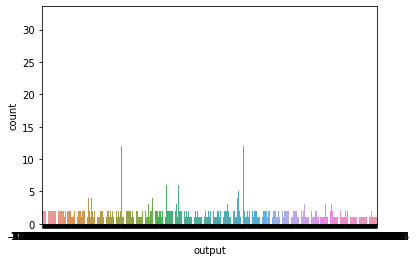

In [43]:
sns.countplot (x ='output', data =data)

In [81]:
from sklearn import preprocessing
from sklearn import utils

lab_enc_tr = preprocessing.LabelEncoder()
encoded = lab_enc_tr.fit_transform(X_test)

In [82]:
print(utils.multiclass.type_of_target(X_test))

continuous


In [83]:
print(utils.multiclass.type_of_target(X_test.astype('int')))

multiclass


In [84]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [85]:
lab_enc_te = preprocessing.LabelEncoder()
encoded = lab_enc_te.fit_transform(y_train)

In [86]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [95]:
print(utils.multiclass.type_of_target(y_train.astype('int')))

multiclass


In [96]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [122]:
X=data.drop(['output'],axis=1)
y=data.output

In [123]:
print('X Shape:',X.shape)
print('y Shape:',y.shape)

X Shape: (1697, 1)
y Shape: (1697,)


# Feature Engineering

Outliers

In [132]:
print("Highest output",data['output'].mean() + 3*data['output'].std())
print("Lowest output",data['output'].mean() - 3*data['output'].std())

Highest output 163.16713363966258
Lowest output -231.34318214854292


In [133]:
data[(data['output'] > -231.34318214854292) | (data['output'] < 163.16713363966258)]

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [136]:
new_data = data[(data['output'] < 163.16713363966258) & (data['output'] > -231.34318214854292)]


In [137]:
upper_limit = data['output'].mean() + 3*data['output'].std()
lower_limit = data['output'].mean() - 3*data['output'].std()

In [138]:
data['output'] = np.where(
    data['output']>upper_limit,
    upper_limit,
    np.where(
        data['output']<lower_limit,
        lower_limit,
        data['output']
    )
)

In [139]:
data['output'].describe()

count    1697.000000
mean      -34.088024
std        65.751719
min      -132.422167
25%       -80.026767
50%       -50.376850
75%       -11.000000
max       134.425495
Name: output, dtype: float64

In [140]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [141]:
print(X_train)

[[-1.43640295]
 [ 1.41484332]
 [ 1.47900234]
 ...
 [-1.53212351]
 [ 1.31890967]
 [-1.69627814]]


In [142]:
print(X_test)

[[ 0.36984753]
 [-0.64972821]
 [-0.4364853 ]
 [ 1.47740655]
 [ 1.02237724]
 [ 1.38276916]
 [-0.10305329]
 [ 0.13776545]
 [ 1.5862598 ]
 [-0.87383237]
 [ 0.20263927]
 [ 1.56695028]
 [ 1.18952937]
 [ 0.36719989]
 [-1.18420681]
 [-0.07274146]
 [-1.6875961 ]
 [-0.99639927]
 [ 1.13591269]
 [ 1.36951804]
 [-0.35681343]
 [-1.55174343]
 [-0.31015483]
 [-1.13523531]
 [ 0.97254822]
 [ 0.36982709]
 [-1.61485072]
 [-0.37826359]
 [ 1.11138426]
 [ 0.84020165]
 [-1.43747434]
 [ 0.79571165]
 [-0.31484052]
 [-1.43703544]
 [ 0.75798343]
 [ 0.77842347]
 [ 0.80860722]
 [-0.38351476]
 [ 1.26597852]
 [ 0.6797497 ]
 [ 0.45503388]
 [-1.57698635]
 [ 0.73630931]
 [-1.56436489]
 [-0.02455414]
 [ 0.38302915]
 [ 0.73946897]
 [-1.56443027]
 [ 0.11420737]
 [-1.19761647]
 [-1.23620697]
 [ 0.3075724 ]
 [-1.65805726]
 [ 1.43954218]
 [ 1.41463431]
 [ 0.18255381]
 [ 0.68905187]
 [ 0.04421003]
 [ 0.58590078]
 [-1.53525415]
 [ 0.67903741]
 [ 0.64425329]
 [ 0.64439031]
 [ 1.07259135]
 [ 0.30103268]
 [-1.36247905]
 [ 0.07642

# ML Models

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lr=LinearRegression().fit(X_train,y_train)
lr_y_pred=lr.predict(X_test)
lr_y_pred

array([-21.43651295, -57.18904248, -49.71144859,  17.40124567,
         1.44514937,  14.082683  , -38.01929325, -29.57472298,
        21.21830282, -65.04749814, -27.29985217,  20.54119361,
         7.30652009, -21.52935534, -75.93111445, -36.95637621,
       -93.58300607, -69.34543925,   5.42639295,  13.61801809,
       -46.91766803, -88.81918485, -45.28153342, -74.21387565,
        -0.30215941, -21.43722969, -91.03211048, -47.66984116,
         4.56627699,  -4.94303543, -84.81221513,  -6.50312545,
       -45.44584238, -84.79682489,  -7.82610657,  -7.10935423,
        -6.05092846, -47.85397891,   9.98729251, -10.56945719,
       -18.44936114, -89.7043551 ,  -8.58613323, -89.26176998,
       -35.26663531, -20.97428531,  -8.47533633, -89.26406274,
       -30.4008125 , -76.4013389 , -77.75455667, -23.620258  ,
       -92.54719458,  16.07349029,  15.20006912, -28.00417039,
       -10.24326657, -32.8553452 , -13.8603714 , -88.24097035,
       -10.59443457, -11.81417749, -11.80937272,   3.20

In [147]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=5)
kn.fit(X,y)
kn_y_pred=kn.predict(X)
kn_y_pred

array([  19.095654  , -107.97711282, -109.85704721, ...,  -80.02169489,
        -73.54948983,  -96.79172538])

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X)
rf_y_pred

array([ -55.3105793 , -111.97324596, -123.73919208, ...,  -83.12800037,
        -85.56362193, -100.93436298])

# Hyperparameter tuning

In [161]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search_y_pred=grid_search.predict(X)
grid_search_y_pred


Fitting 3 folds for each of 288 candidates, totalling 864 fits


array([ -37.97956147,  -88.45019913, -112.02820492, ...,  -82.05083364,
        -84.46381055,  -97.0406814 ])

# Evalution Metrics

In [157]:
from sklearn.metrics import mean_squared_error
print("MSE of Linear Regression",mean_squared_error(y_test,lr_y_pred))

MSE of Linear Regression 3924.0821704470704


In [153]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,lr_y_pred)
print("R2 score of Linear Regression:",r2)

R2 score of Linear Regression: 0.15687380649348748
